In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [2]:
#导入华夫饼库中的华夫饼模块
from pywaffle import Waffle

ModuleNotFoundError: No module named 'pywaffle'

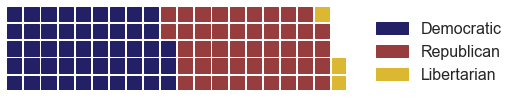

In [12]:
data ={'Democratic':48,"Republican":46,'Libertarian':3}

fig = plt.figure(figsize=(8,3)
     ,FigureClass=Waffle
     ,rows=5
     ,values=data
    #,icons='child'
    #,icon_size=10
     ,colors=("#232066", "#983D3D", "#DCB732")
     ,legend={'loc': 'upper right', 'bbox_to_anchor': (1.5, 1)}
     )
#此处图例用的字典，loc,指定位置。后面，bbox_to_anchor，点在图例的右上

In [3]:
#导入数据
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df_raw.head()

URLError: <urlopen error [Errno 11004] getaddrinfo failed>

In [21]:
name = ["汽车制造商","型号名称","发动机排量(L)","制造年份","气缸数量","手动/自动"
              ,"驱动类型","城市里程/加仑","公路里程/加仑","汽油种类","车辆类型"]

In [22]:
df_raw.groupby("class").size()

class
2seater        5
compact       47
midsize       41
minivan       11
pickup        33
subcompact    35
suv           62
dtype: int64

In [23]:
df_raw.groupby("class").size().reset_index()

,class,0
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33
5,subcompact,35
6,suv,62


In [25]:
df_class=df_raw.groupby("class").size().reset_index(name='counts')

In [26]:
n_categories = df_class.shape[0]
#使用光谱和列表推倒式准备颜色
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

In [27]:
#依然列表推倒式，准备图例
["{1}".format(n[0], n[1]) for n in df_class[['class', 'counts']].itertuples()]

['2seater', 'compact', 'midsize', 'minivan', 'pickup', 'subcompact', 'suv']

In [31]:
[*df_class[['class', 'counts']].itertuples()]

[Pandas(Index=0, _1='2seater', counts=5),
 Pandas(Index=1, _1='compact', counts=47),
 Pandas(Index=2, _1='midsize', counts=41),
 Pandas(Index=3, _1='minivan', counts=11),
 Pandas(Index=4, _1='pickup', counts=33),
 Pandas(Index=5, _1='subcompact', counts=35),
 Pandas(Index=6, _1='suv', counts=62)]

In [32]:
#太麻烦了
[n[1] for n in df_class[['class', 'counts']].itertuples()]

['2seater', 'compact', 'midsize', 'minivan', 'pickup', 'subcompact', 'suv']

In [33]:
#数据准备（占比，颜色以及标签）

#按车辆类型
df_class = df_raw.groupby('class').size().reset_index(name='counts_class')
n_categories = df_class.shape[0]
colors_class = [plt.cm.Set3(i/float(n_categories)) for i in range(n_categories)]
#colors_class = [plt.cm.nipy_spectral(i/float(n_categories)) for i in range(n_categories)] #更换成了更容易查看的颜色
labels_class = [n[1] for n in df_class[['class', 'counts_class']].itertuples()] #更加简单的写法

#按气缸数量
df_cyl = df_raw.groupby('cyl').size().reset_index(name='counts_cyl')
n_categories = df_cyl.shape[0]
colors_cyl = [plt.cm.Spectral(i/float(n_categories)) for i in range(n_categories)]
#colors_cyl = [plt.cm.nipy_spectral(i/float(n_categories)) for i in range(n_categories)]
labels_cyl = ["{1}".format(n[0], n[1]) for n in df_cyl[['cyl', 'counts_cyl']].itertuples()]

#按制造商
df_make = df_raw.groupby('manufacturer').size().reset_index(name='counts_make')
n_categories = df_make.shape[0]
colors_make = [plt.cm.tab20b(i/float(n_categories)) for i in range(n_categories)]
#colors_make = [plt.cm.nipy_spectral(i/float(n_categories)) for i in range(n_categories)]
labels_make = ["{1}".format(n[0], n[1]) for n in df_make[['manufacturer', 'counts_make']].itertuples()]

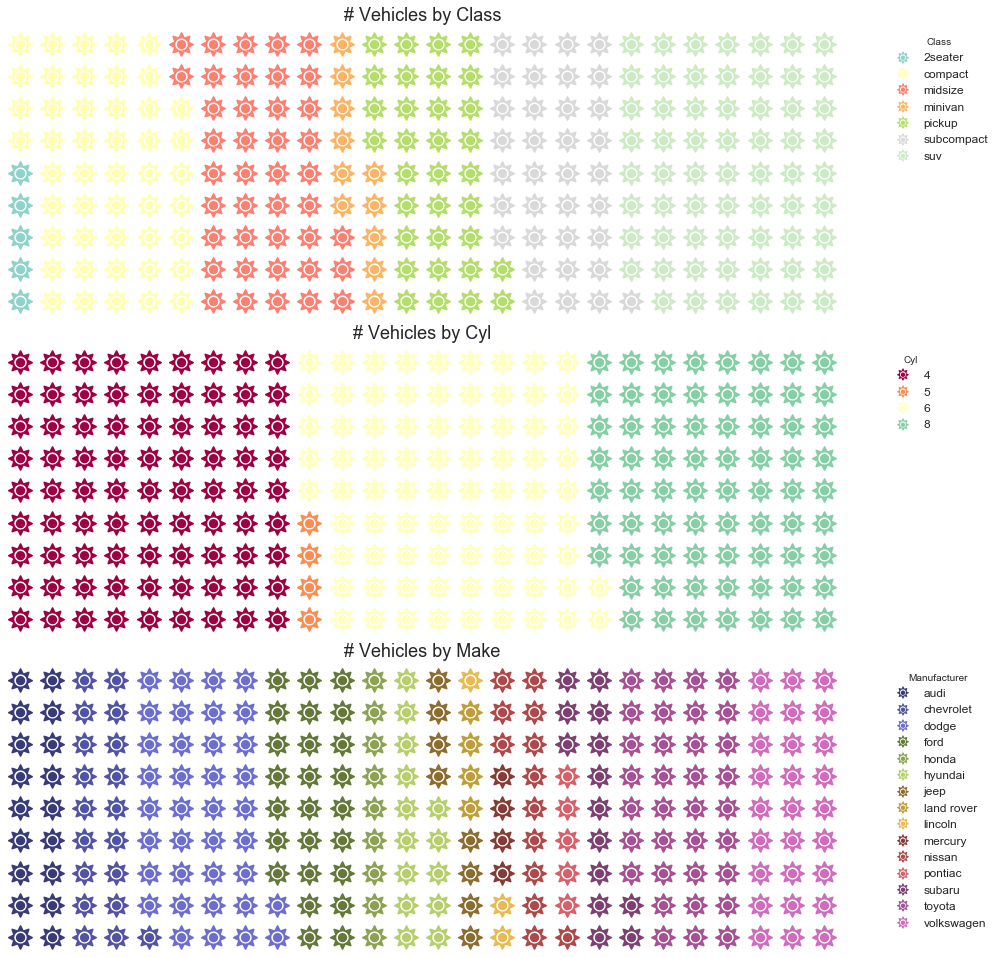

In [37]:
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '311': #这里的数字表示，3行，1列，索引为1的图
        {'values': df_class['counts_class'],
         'labels': labels_class,
         'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Class'},
         'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize':18},
         'colors': colors_class
        },
        '312': {
            'values': df_cyl['counts_cyl'],
            'labels': labels_cyl,
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Cyl'},
            'title': {'label': '# Vehicles by Cyl', 'loc': 'center', 'fontsize':18},
            'colors': colors_cyl
        },
        '313': {
            'values': df_make['counts_make'],
            'labels': labels_make,
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Manufacturer'},
            'title': {'label': '# Vehicles by Make', 'loc': 'center', 'fontsize':18},
            'colors': colors_make
        }
    },
    rows=9,
    figsize=(16, 14),
   icons='sun', icon_size=25, 
   icon_legend=True#legend也变成车车
)